<font color='Black' size= '26'>7130ICT Data Analytics Assignment</font>

<font color='Black' size= '5'>S5304488, Anusha Ramesh, anusha.ramesh@griffithuni.edu.au</font>

<font color='Black' size= '5'>S5296353, Chandrika Mallipudi, chandrika.mallipudi@griffithuni.edu.au</font>

In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter
from IPython.display import display, HTML
import re

# Part 1 – Data Preparation and Preprocessing.

## 1.1 Describe the dataset.

### Describe the dataset (e.g.: type of column, value range).

In [3]:
df = pd.read_csv("data.csv", low_memory=False)
print("The Dataset has", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(5)

The Dataset has 318477  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
#type of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [4]:
df.describe(include='all')

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
count,318477,318477,306473,318477,197229,122658,197229,197229,318470,302302,318477.000000,318477.000000,302379
unique,318477,168065,40628,163,65,19,30,338,234287,250901,NaN,NaN,4
top,37404348,Project Manager,Jora Local,2018-10-17T00:00:00.000Z,Sydney,CBD & Inner Suburbs,Information & Communication Technology,Other,Whether they’re racing to fill shelves or scan...,"<p><strong>At ALDI, our people are the key to ...",NaN,NaN,Full Time
freq,1,1298,9354,13059,60765,32170,22796,11349,312,212,NaN,NaN,201225
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.813544,114.432342,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.063125,177.594941,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,40.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,70.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,120.000000,NaN


### How many records are there in the dataset?

In [13]:
print("There are",df.shape[0], "rows in the given data dataset")

There are 318477 rows in the given data dataset


### Which period does it cover? How many different dates have job postings?

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
print("The period covered in the dataset starts from", min(df["Date"]).date(),"to", max(df["Date"]).date())

The period covered in the dataset starts from 2018-10-01 to 2019-03-13


In [17]:
print('There are {0} different dates having job postings'.format(df['Date'].nunique()))
df["Date"].value_counts()

There are 163 different dates having job postings


Date
2018-10-17 00:00:00+00:00    13059
2018-12-14 00:00:00+00:00    11505
2019-01-22 00:00:00+00:00     9544
2019-01-10 00:00:00+00:00     8736
2018-10-31 00:00:00+00:00     8641
                             ...  
2019-03-03 00:00:00+00:00        3
2018-11-14 00:00:00+00:00        2
2019-01-25 00:00:00+00:00        2
2019-03-10 00:00:00+00:00        2
2019-03-09 00:00:00+00:00        1
Name: count, Length: 163, dtype: int64

### How many locations does the dataset have? Which location has the most job postings?

In [78]:
print("There are", len(df["Location"].value_counts()), "locations in the dataset")

There are 65 locations in the dataset


In [45]:
locations_count = df['Location'].value_counts()
locations_count

Location
Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: count, Length: 65, dtype: int64

#### <font color=blue>Sydney has the most job postings</font>

### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings

In [19]:
print("There are", len(df["Classification"].value_counts()), "Job classifications in the dataset")

There are 30 Job classifications in the dataset


In [47]:
classification_count = df['Classification'].value_counts()
classification_count

Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property   

### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number. 

In [21]:
# We have chosen Healthcare & Medical as our favourite job sector

health_medical_sector = df[df["Classification"]=="Healthcare & Medical"]
print("The total sub-sectors in Healthcare & Medical are", len(health_medical_sector["SubClassification"].value_counts()))

The total sub-sectors in Healthcare & Medical are 33


In [83]:
health_medical_sector["SubClassification"].value_counts()

SubClassification
Nursing - Aged Care                                2130
Physiotherapy, OT & Rehabilitation                 1821
General Practitioners                              1263
Psychology, Counselling & Social Work              1123
Nursing - General Medical & Surgical               1066
Dental                                             1046
Other                                               829
Medical Administration                              812
Pharmacy                                            808
Medical Specialists                                 748
Pharmaceuticals & Medical Devices                   502
Management                                          496
Medical Imaging                                     487
Nursing - A&E, Critical Care & ICU                  446
Nursing - Psych, Forensic & Correctional Health     433
Nursing - Management                                374
Sales                                               347
Nursing - Community, Maternal 

### List the salary ranges and their total of job postings

In [23]:
df["Salary Range"] = df["LowestSalary"].astype("string") + "-" + df["HighestSalary"].astype("string")
df["Salary Range"].value_counts()

Salary Range
0-30       62586
40-50      34431
70-80      28706
60-70      28495
100-120    27669
50-60      27018
150-200    25833
120-150    24506
80-100     24249
30-40      23471
200-999    11405
Name: count, dtype: Int64

###  List the job types. In each job type, what are the lowest salary and highest salary?

In [86]:
df['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [24]:
df.groupby(['JobType']).agg({'LowestSalary': 'min','HighestSalary':'max'}).reset_index()

,JobType,LowestSalary,HighestSalary
0,Casual/Vacation,0,999
1,Contract/Temp,0,999
2,Full Time,0,999
3,Part Time,0,999


## Normalize and clean data

### The salaries are kept in the dataset as “HighestSalary” and “LowestSalary”. You should calculate the “AverageSalary” for each job.

In [24]:
df = df.assign(AverageSalary = df[['LowestSalary', 'HighestSalary']].mean(axis=1).astype(int))
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15,8
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15,8
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15,8
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15,8
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07 00:00:00+00:00,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,0-30,15,8
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0-30,15,8
8,37404301,Telemarketer,Reventon Investments,2018-10-07 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,0-30,15,8
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,0-30,15,8


### The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters

In [6]:
df["Id_length"] = df["Id"].apply(lambda x: len(str(x)))
df.loc[df.Id_length!=8].head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11 00:00:00+00:00,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,0-30,15,64
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,0-30,15,64


In [7]:
df['Id'] = df['Id'].apply(lambda x: str(x)[0:8])
df.Id

0         37404348
1         37404337
2         37404356
3         37404330
4         37404308
            ...   
318472    38564891
318473    38564940
318474    38552964
318475    38534438
318476    38561751
Name: Id, Length: 318477, dtype: object

### The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed.

In [10]:
#df['Date']=pd.to_datetime(df['Date']).dt.normalize()
#df

df["Date"] = df["Date"].replace({r'T.*':''}, regex=True) 
df["Date"]

0        2018-10-07 00:00:00+00:00
1        2018-10-07 00:00:00+00:00
2        2018-10-07 00:00:00+00:00
3        2018-10-07 00:00:00+00:00
4        2018-10-07 00:00:00+00:00
                    ...           
318472   2019-03-13 00:00:00+00:00
318473   2019-03-13 00:00:00+00:00
318474   2019-03-12 00:00:00+00:00
318475   2019-03-08 00:00:00+00:00
318476   2019-03-13 00:00:00+00:00
Name: Date, Length: 318477, dtype: datetime64[ns, UTC]

### Change type of “Id” column to numeric and change type of “Date” column to DateTime

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df['Id']=pd.to_numeric(df['Id'])
df.dtypes

Id                                 int64
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
Salary Range              string[python]
AverageSalary                      int32
Id_length                          int64
dtype: object

### Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it.

In [16]:
duplicate_data=df[df.duplicated()]
print("There are ",duplicate_data.shape[0],"duplicates in the dataset")

There are  108 duplicates in the dataset


In [109]:
#dataset before fixing duplicates
df.shape

(318477, 16)

In [18]:
df.drop_duplicates(inplace=True)
duplicate_count = df[df.duplicated()].shape[0]
print("After fixing,there are", duplicate_count,"duplicates")

After fixing,there are 0 duplicates


In [111]:
#dataset after fixing duplicates
df.shape

(318369, 16)

### Check missing data and visualize them in a corresponding chart.

In [20]:
missing_data=df.isna().sum()
missing_data

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
Salary Range              0
AverageSalary             0
Id_length                 0
dtype: int64

[Text(0.5, 1.0, 'Missing data in dataset'),
 Text(0.5, 0, 'Missing data vs existing data'),
 Text(0, 0.5, 'Attributes')]

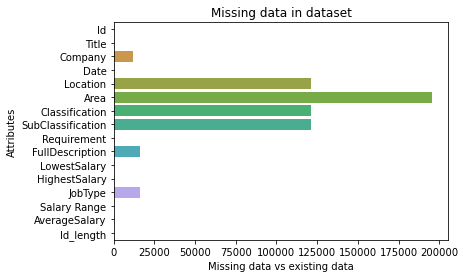

In [21]:
missing_values=missing_data.tolist()
missing_columns=missing_data.index.tolist()
sns.barplot(x=missing_values, y=missing_columns).set(title="Missing data in dataset", xlabel = "Missing data vs existing data", ylabel = "Attributes")

# Part 2 – Data Understanding

### Get the salary ranges using “AverageSalary”, the total jobs of each range and display them in the bar chart

In [41]:
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Id_length,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,,,
15,62586,62586,59564,62586,38488,24364,38488,38488,62584,56043,62586,62586,56058,62586,62586,"15,000",62586
35,23471,23471,22292,23471,16391,9809,16391,16391,23471,22091,23471,23471,22093,23471,23471,"35,000",23471
45,34431,34431,32071,34431,21731,13259,21731,21731,34430,33575,34431,34431,33580,34431,34431,"45,000",34431
55,27018,27018,25670,27018,16552,10746,16552,16552,27017,26197,27018,27018,26213,27018,27018,"55,000",27018
65,28495,28495,27286,28495,18117,11390,18117,18117,28495,27542,28495,28495,27564,28495,28495,"65,000",28495
75,28706,28706,27788,28706,17047,10451,17047,17047,28706,27664,28706,28706,27668,28706,28706,"75,000",28706
90,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,24249,24249,"90,000",24249
110,27669,27669,27146,27669,17133,10571,17133,17133,27667,26678,27669,27669,26679,27669,27669,"110,000",27669
135,24506,24506,24157,24506,14693,9476,14693,14693,24506,23602,24506,24506,23604,24506,24506,"135,000",24506


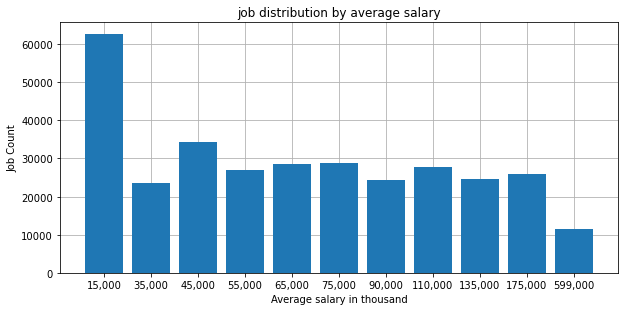

In [46]:
f, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.grid(zorder=0)
ax.xaxis.grid()
f.autofmt_xdate(bottom=0.3,rotation=0,ha='center')
ax.bar(averageSalaryDf['AverageSalary'],averageSalaryDf['Count'],zorder=3)
plt.ylabel('Job Count')
plt.xlabel('Average salary in thousand')
plt.title("job distribution by average salary")
plt.show()

### Display the list of job types and the number of jobs of each type using pie chart.

In [51]:
df_JobType_postings=df.groupby(['JobType']).size().reset_index(name='JobCount')
df_JobType_postings

,JobType,JobCount
0,Casual/Vacation,25353
1,Contract/Temp,53897
2,Full Time,201172
3,Part Time,21889


In [52]:
df["JobType"].value_counts()

JobType
Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: count, dtype: int64

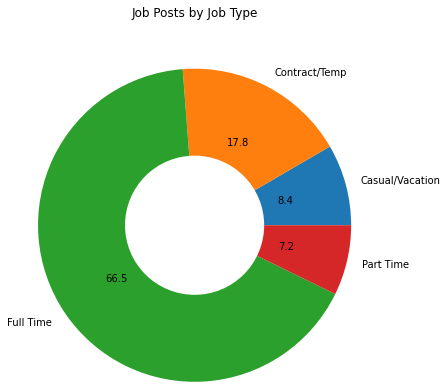

In [57]:
plt.pie(df_JobType_postings['JobCount'], labels=df_JobType_postings['JobType'],autopct='%.1f'
,radius=1.8)

plt.title("Job Posts by Job Type",fontsize=12, pad=100)

centre_circle = plt.Circle((0, 0), 0.8, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

#### <font color=blue> From above pie chart, we can see that there are 4 different pie chart. Full Time, Contract/Temp, Part Time and Casual/Vacation.</font>
#### <font color=blue> There are almost 66.5% of jobs which are full time followed by Contract/temp with 17.8% and Casual with job % of 8.4 and Part time with 7.2%</font>

### Display the list of job sectors and the number of jobs of each type using horizontal bar chart.

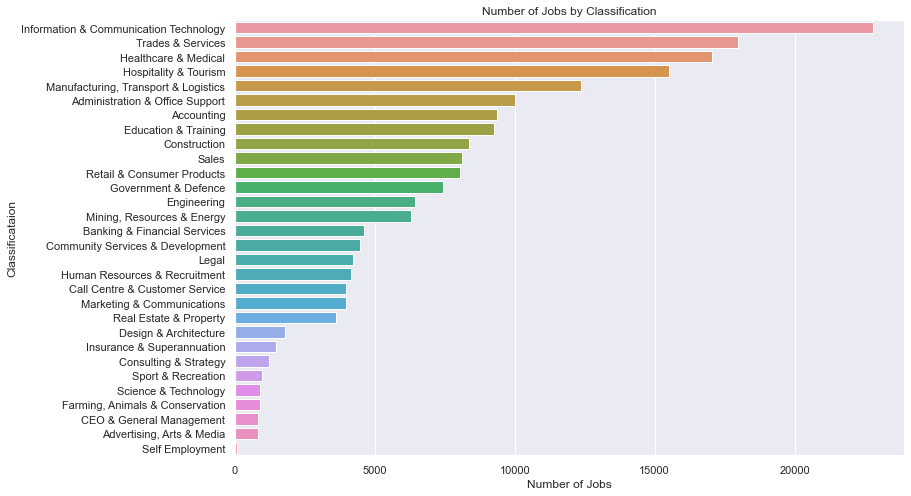

In [58]:
jobs=df.Classification.value_counts().sort_values(ascending=False).index
jobs_count=df.Classification.value_counts().sort_values(ascending=False).values

sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(x=jobs_count, y=jobs).set(title="Number of Jobs by Classification")
plt.ylabel('Classificataion')
plt.xlabel('Number of Jobs')
plt.show()

### Choose your favorite location. Visualize the market share of that location in pie chart

In [59]:
fav_location=df.loc[df.Location=='Sydney']
fav_location.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15,8
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15,8
19,37404247,Assembler,Zoom Recruitment & Training,2018-10-07 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,"Manufacturing, Transport & Logistics",Assembly & Process Work,"Our Client, located in Sydney West, has roles ...",NaN,0,30,NaN,0-30,15,8
27,37404311,Investment Accountant - NAB Asset Servicing,National Australia Bank,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Banking & Financial Services,Analysis & Reporting,Entry level opportunity in Investment Accounti...,NaN,0,30,NaN,0-30,15,8


In [60]:
Sydney_jobsectors=fav_location.Classification.value_counts().sort_values(ascending=False).index
Sydney_jobsectors_count=fav_location.Classification.value_counts().sort_values(ascending=False).values

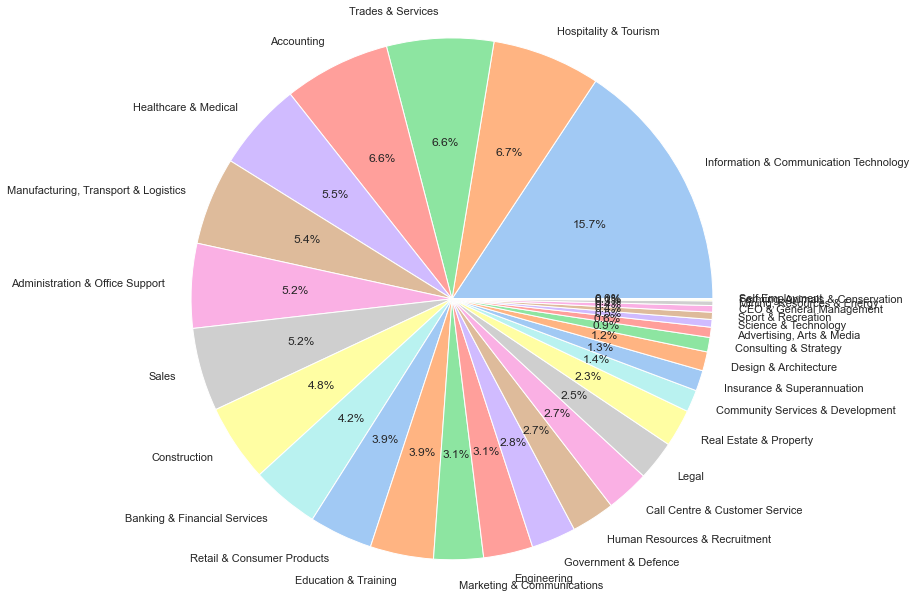

In [63]:
colors = sns.color_palette('pastel')[0:30]
plt.pie(Sydney_jobsectors_count, labels=Sydney_jobsectors, autopct='%1.1f%%', colors=colors, radius=1.5)
plt.show()

#### <font color=blue> From above pie chart, we can see that there are 30 different classifications where the the top 5 classifications with most job postings in Sydney areare Information & Communication Technology,  Hospitality & Tourism,Trades & Services, accounting and Healthcare & Medical.</font>

### Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart

In [99]:
top_Cities=df.groupby(['Location']).size().sort_values(ascending=False).head(30).reset_index(name="Job Postings")
top_Cities

,Location,Job Postings
0,Sydney,60729
1,Melbourne,46656
2,Brisbane,21455
3,Perth,13192
4,Adelaide,6650
5,ACT,6249
6,"Newcastle, Maitland & Hunter",3953
7,Gold Coast,3587
8,South West Coast VIC,1789
9,Mackay & Coalfields,1701


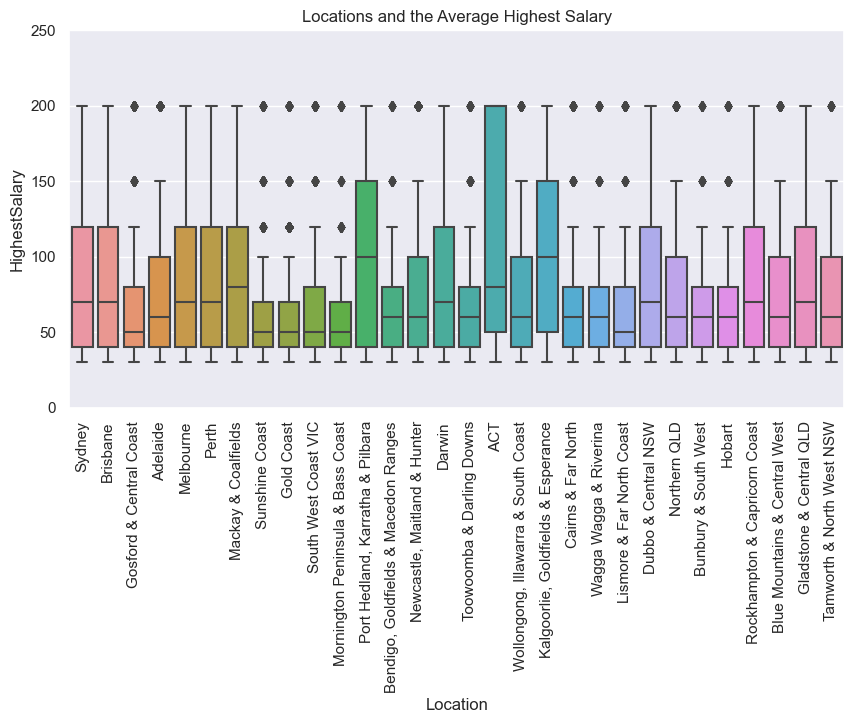

In [100]:
from matplotlib.pyplot import figure
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]


figure(figsize=(10, 5), dpi=100)

sns.boxplot(x="Location", y="HighestSalary", data=df_salary_locations_high)
plt.ylim(0,250)
plt.xticks(rotation=90)
plt.title("Locations and the Average Highest Salary")
plt.show()

##### <font color=blue>From the above box plot chart we can see that, Sydney, Brisbane, Melbourne,and Perth, which are the top 4 cities that have higher number of jobs postings and equal distribution of salaries.
##### <font color=blue>Adelaide seem to have a bit lower salary when compared to other cities. 
##### <font color=blue>ACT is higher than the other locations. 
##### <font color=blue>Also other locations such as Port Hedland, Karratha & Pilbara and Kalgoorlie, Goldfields and Esperance show higher salaries compared to most other locations.
##### <font color=blue>Gold Coast and Sunshine Coast have the lower salaries. </font>

# Part 3 – Data Analysis and Visualisation.

## Analyse by comparison

### Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions:


#### Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [102]:
Sydney_jobs=df.loc[df.Location=='Sydney']
print("Syndey has", Sydney_jobs.shape[0], "Jobs")
Sydney_jobs.info()

Syndey has 60729 Jobs
<class 'pandas.core.frame.DataFrame'>
Index: 60729 entries, 0 to 197222
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Id                 60729 non-null  int64              
 1   Title              60729 non-null  object             
 2   Company            58884 non-null  object             
 3   Date               60729 non-null  datetime64[ns, UTC]
 4   Location           60729 non-null  object             
 5   Area               53746 non-null  object             
 6   Classification     60729 non-null  object             
 7   SubClassification  60729 non-null  object             
 8   Requirement        60729 non-null  object             
 9   FullDescription    57427 non-null  object             
 10  LowestSalary       60729 non-null  int64              
 11  HighestSalary      60729 non-null  int64              
 12  JobType            57441 non

In [103]:
Melbourne_jobs=df.loc[df.Location=='Melbourne']
print("Melbourne has", Melbourne_jobs.shape[0], "Jobs")
Melbourne_jobs.info()

Melbourne has 46656 Jobs
<class 'pandas.core.frame.DataFrame'>
Index: 46656 entries, 8 to 197225
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Id                 46656 non-null  int64              
 1   Title              46656 non-null  object             
 2   Company            44907 non-null  object             
 3   Date               46656 non-null  datetime64[ns, UTC]
 4   Location           46656 non-null  object             
 5   Area               41268 non-null  object             
 6   Classification     46656 non-null  object             
 7   SubClassification  46656 non-null  object             
 8   Requirement        46652 non-null  object             
 9   FullDescription    43804 non-null  object             
 10  LowestSalary       46656 non-null  int64              
 11  HighestSalary      46656 non-null  int64              
 12  JobType            43810 

#### <font color=blue> Sydney has more jobs of 60,729 compare to Melbourne which has 46,656 </font>

In [104]:
Sydney_jobs.groupby(['JobType']).size()

JobType
Casual/Vacation     3017
Contract/Temp      10989
Full Time          40586
Part Time           2849
dtype: int64

In [105]:
Melbourne_jobs.groupby(['JobType']).size()

JobType
Casual/Vacation     3453
Contract/Temp       7208
Full Time          29666
Part Time           3483
dtype: int64

#### In each city, which are top 5 job sectors? How many jobs are there in each sector

In [107]:
print("The top 5 job sectors and jobs postings in Syndey are below")
Sydney_jobs.Classification.value_counts(ascending=False).head(5)

The top 5 job sectors and jobs postings in Syndey are below


Classification
Information & Communication Technology    9543
Hospitality & Tourism                     4071
Trades & Services                         4023
Accounting                                4008
Healthcare & Medical                      3335
Name: count, dtype: int64

In [108]:
print("The top 5 job sectors and jobs postings in Melbourne are below")
Melbourne_jobs.Classification.value_counts(ascending=False).head(5)

The top 5 job sectors and jobs postings in Melbourne are below


Classification
Information & Communication Technology    5888
Hospitality & Tourism                     4057
Trades & Services                         3829
Manufacturing, Transport & Logistics      3555
Healthcare & Medical                      3485
Name: count, dtype: int64

#### Visualise the top 5 job sectors in pie chart for each city

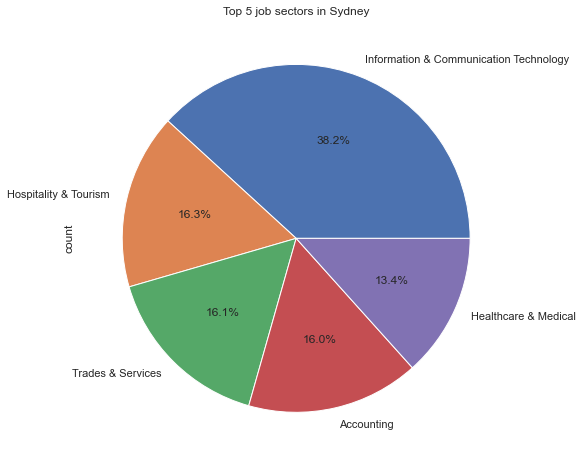

Classification
Information & Communication Technology    9543
Hospitality & Tourism                     4071
Trades & Services                         4023
Accounting                                4008
Healthcare & Medical                      3335
Name: count, dtype: int64


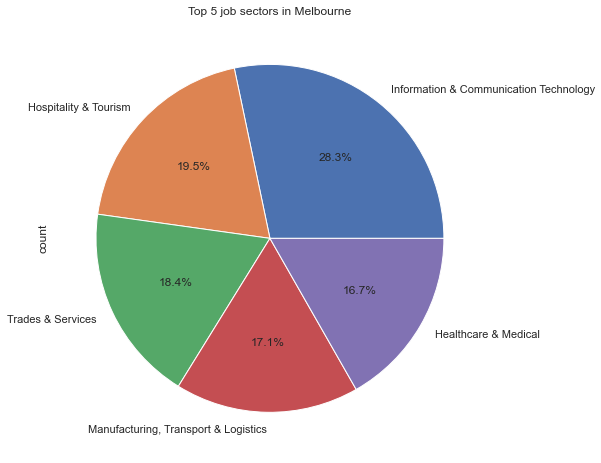

Classification
Information & Communication Technology    5888
Hospitality & Tourism                     4057
Trades & Services                         3829
Manufacturing, Transport & Logistics      3555
Healthcare & Medical                      3485
Name: count, dtype: int64


In [109]:
Sydney_jobs.Classification.value_counts(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 job sectors in Sydney")
plt.show()
print(Sydney_jobs.Classification.value_counts(ascending=False).head(5))

Melbourne_jobs.Classification.value_counts(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 job sectors in Melbourne")
plt.show()
print(Melbourne_jobs.Classification.value_counts(ascending=False).head(5))

#### In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

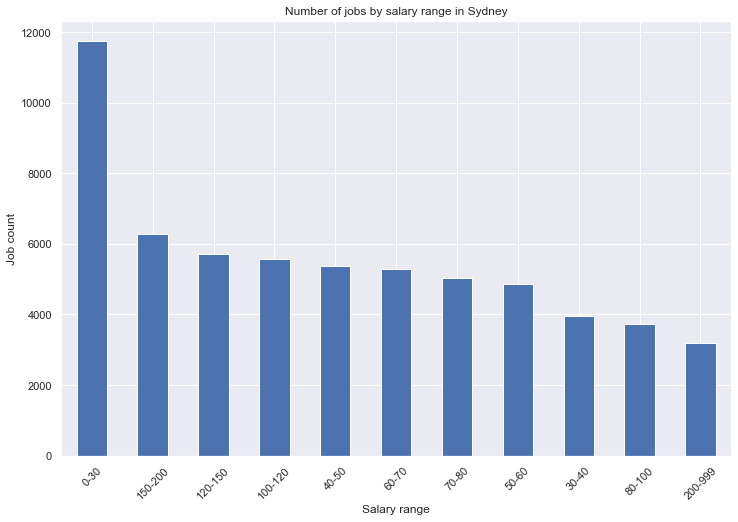

In [112]:
Sydney_jobs['Salary Range'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Job count')
plt.xlabel('Salary range')
plt.title("Number of jobs by salary range in Sydney")
plt.show()

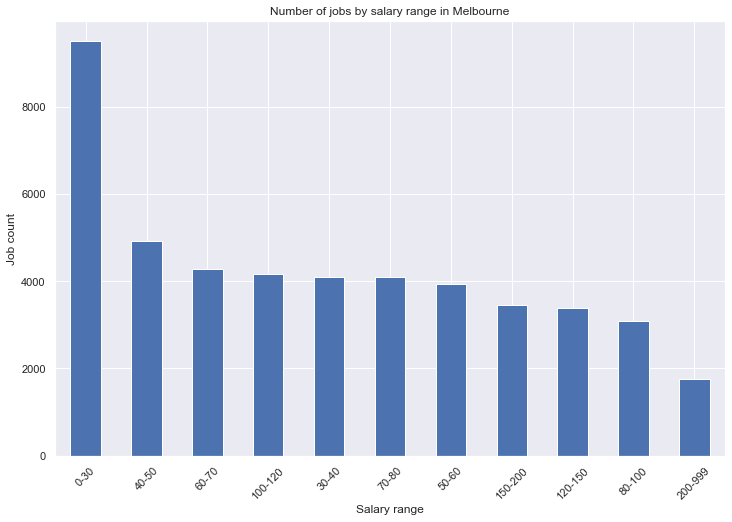

In [113]:
Melbourne_jobs['Salary Range'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Job count')
plt.xlabel('Salary range')
plt.title("Number of jobs by salary range in Melbourne")
plt.show()

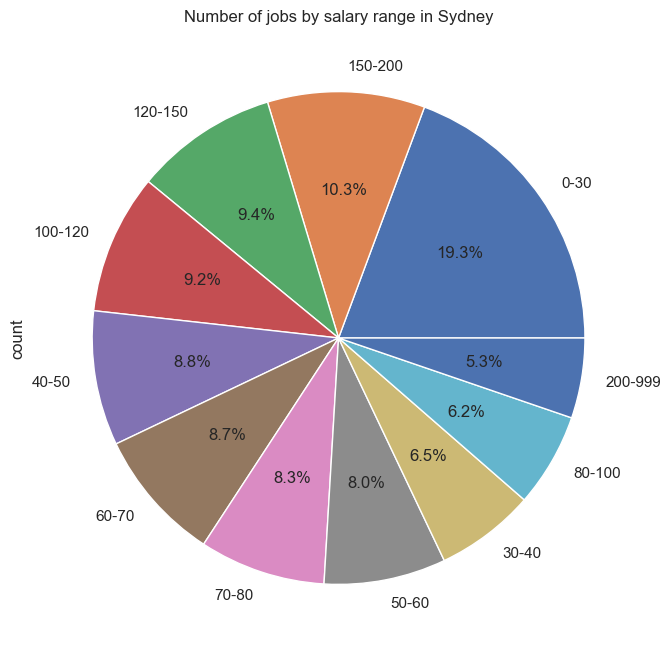

In [195]:
Sydney_jobs['Salary Range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Number of jobs by salary range in Sydney")
plt.show()

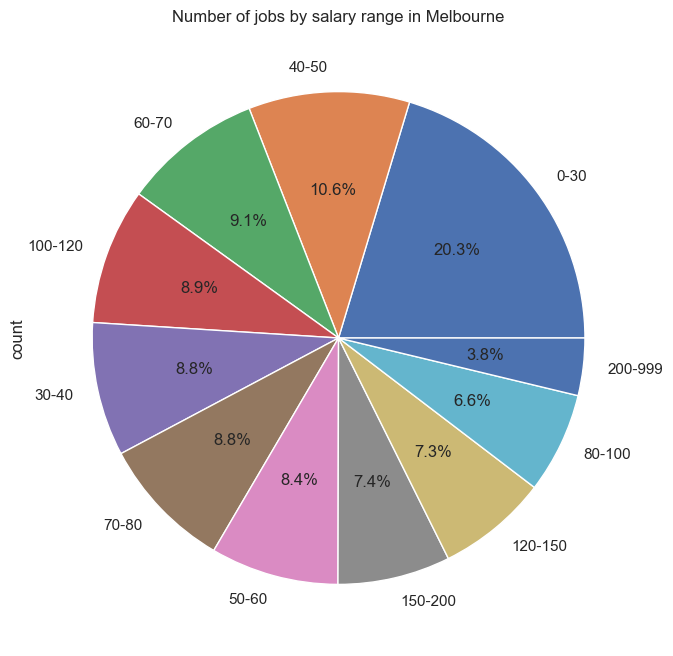

In [196]:
Melbourne_jobs['Salary Range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Number of jobs by salary range in Melbourne")
plt.show()

#### <font color=blue> salary range percantage from the cities Melbourne and Sydney is almost same. For salary range 200k-999k, Sydney's percentage is 5.3% whereas Melbourne's percentage is 3.8%. Other salary ranges have no much diference, hence it is difficult to decide which city is well paid compared to other. </font>

#### List top 5 companies in each city? Which sectors do they belong to?

In [119]:
print("The top 5 compannies in Syndey are:")
Sydney_jobs.Company.value_counts().head(5)

The top 5 compannies in Syndey are:


Company
Jora Local                       1919
Robert Walters                    607
Design & Build                    595
Paxus                             375
Bluefin Resources Pty Limited     354
Name: count, dtype: int64

In [120]:
Sydney_jobs1 = Sydney_jobs.loc[Sydney_jobs.Company=='Jora Local']
Sydney_jobs1.Classification.value_counts().head()

Classification
Hospitality & Tourism         1879
Trades & Services               23
Retail & Consumer Products      17
Name: count, dtype: int64

In [121]:
Sydney_jobs2 = Sydney_jobs.loc[Sydney_jobs.Company=='Robert Walters']
Sydney_jobs2.Classification.value_counts().head()

Classification
Information & Communication Technology    253
Accounting                                106
Banking & Financial Services               99
Administration & Office Support            48
Call Centre & Customer Service             18
Name: count, dtype: int64

In [122]:
Sydney_jobs3 = Sydney_jobs.loc[Sydney_jobs.Company=='Design & Build']
Sydney_jobs3.Classification.value_counts().head()

Classification
Construction              331
Real Estate & Property    101
Trades & Services          47
Design & Architecture      37
Engineering                37
Name: count, dtype: int64

In [123]:
Sydney_jobs4 = Sydney_jobs.loc[Sydney_jobs.Company=='Paxus']
Sydney_jobs4.Classification.value_counts().head()

Classification
Information & Communication Technology    346
Administration & Office Support             8
Government & Defence                        4
Accounting                                  4
Human Resources & Recruitment               3
Name: count, dtype: int64

In [124]:
Sydney_jobs5 = Sydney_jobs.loc[Sydney_jobs.Company=='Bluefin Resources Pty Limited']
Sydney_jobs5.Classification.value_counts().head()

Classification
Information & Communication Technology    111
Banking & Financial Services              105
Marketing & Communications                 34
Consulting & Strategy                      28
Insurance & Superannuation                 24
Name: count, dtype: int64

In [125]:
Melbourne_jobs.Company.value_counts().head(5)

Company
Jora Local                                                                          2310
Department of Education & Training Victoria                                          417
Design & Build                                                                       352
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!     271
Hays Accountancy & Finance                                                           241
Name: count, dtype: int64

In [126]:
Melbourne_jobs1 = Melbourne_jobs.loc[Melbourne_jobs.Company=='Jora Local']
Melbourne_jobs1.Classification.value_counts().head()

Classification
Hospitality & Tourism         2278
Trades & Services               26
Retail & Consumer Products       6
Name: count, dtype: int64

In [127]:
Melbourne_jobs2 = Melbourne_jobs.loc[Melbourne_jobs.Company=='Department of Education & Training Victoria']
Melbourne_jobs2.Classification.value_counts().head()

Classification
Education & Training    417
Name: count, dtype: int64

In [128]:
Melbourne_jobs3 = Melbourne_jobs.loc[Melbourne_jobs.Company=='Design & Build']
Melbourne_jobs3.Classification.value_counts().head()

Classification
Construction              147
Engineering               101
Design & Architecture      46
Government & Defence       20
Real Estate & Property     16
Name: count, dtype: int64

In [129]:
Melbourne_jobs4 = Melbourne_jobs.loc[Melbourne_jobs.Company=='Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!']
Melbourne_jobs4.Classification.value_counts().head()

Classification
Information & Communication Technology    250
Administration & Office Support             6
Human Resources & Recruitment               4
Engineering                                 2
Sales                                       2
Name: count, dtype: int64

In [130]:
Melbourne_jobs5 = Melbourne_jobs.loc[Melbourne_jobs.Company=='Hays Accountancy & Finance']
Melbourne_jobs5.Classification.value_counts().head()

Classification
Accounting    241
Name: count, dtype: int64

#### Between 2 cities, which do you think it is better for employees. Explain your choice.

#### <font color=blue> For employees who prefer Information & Communication Technology sector, Sydney seems to be better because this sector has more jobs when compared with Sydney and Melbourne top 5 companies.
#### <font color=blue>For employees who prefer Hospitality & Tourism sector, Melbourne seems to be better because this sector has more jobs when compared with Sydney and Melbourne top 5 companies.
#### <font color=blue> The remaining top sectors are Construction, Banking, Realestate, Engineering, Accounting also has more job postings in sydney. When comparing with these 2 cities, Sydney will be first option as it has more job opportunities.</font>

## Analyse by time

### In this part, we will analyse the jobs based on the posting date.

#### Visualise the number of job posts by month

In [131]:
df_date=df.copy()
df_date['Month'] = df_date['Date'].dt.strftime('%b')
df_date.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length,Month
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8,Oct
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8,Oct
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15,8,Oct
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15,8,Oct
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15,8,Oct


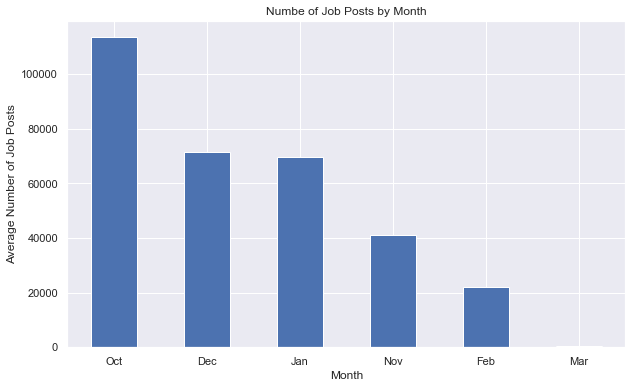

In [133]:
fig = plt.figure(figsize = (10,6))

Jobs_by_month = df_date['Month'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Numbe of Job Posts by Month")
plt.xlabel('Month')
plt.ylabel('Average Number of Job Posts')

plt.show()

#### Visualise the number of job posts by day of week

In [134]:
df_date["Week day"] = df_date["Date"].dt.day_name()
Jobs_by_weekday = df_date['Week day'].value_counts()
Jobs_by_weekday

Week day
Wednesday    66500
Friday       61813
Thursday     59173
Tuesday      57885
Monday       51948
Sunday       12561
Saturday      8489
Name: count, dtype: int64

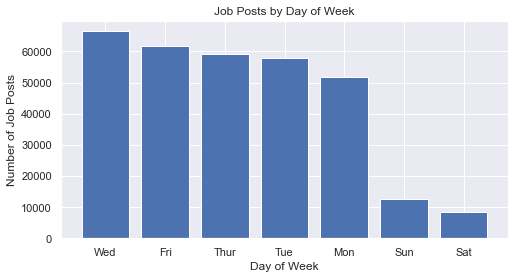

In [135]:
fig = plt.figure(figsize = (8,4))
Days = ["Wed", "Fri", "Thur", "Tue", "Mon","Sun","Sat"]
plt.bar(Days, Jobs_by_weekday)
plt.title("Job Posts by Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Number of Job Posts')
plt.show()

#### Visualise the number of job posts by day of the month

In [136]:
Jobs_by_day_of_month = df_date['Date'].dt.day.value_counts().sort_index()
Jobs_by_day_of_month

Date
1      4374
2      9675
3     12215
4     16727
5     15027
6      6982
7     11308
8      9276
9     15822
10    20137
11    15409
12    17492
13    14783
14    14629
15    10123
16     8329
17    15539
18    16151
19     8720
20     8910
21    13684
22    10950
23     1764
24     2542
25     2015
26     2820
27     3557
28     3225
29     5944
30     9588
31    10652
Name: count, dtype: int64

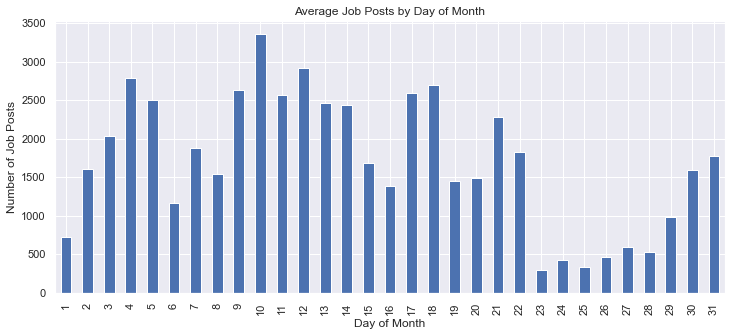

In [137]:
for value in Jobs_by_day_of_month.values:
    Jobs_by_day_of_month = Jobs_by_day_of_month.replace(to_replace = value, value = value/6)

plt.figure(figsize=(12,5))
Jobs_by_day_of_month.plot(kind='bar')
plt.title("Average Job Posts by Day of Month")
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts')
plt.show()

#### Visualise trending of the job postings for the big cities

In [345]:
top_cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide" ]
data_top_cities = df.loc[df['Location'].isin(top_cities)]
data_top_cities.Location.value_counts()

Location
Sydney       60729
Melbourne    46656
Brisbane     21455
Perth        13192
Adelaide      6650
Name: count, dtype: int64

In [346]:
data_top_cities = data_top_cities[["Location","Date"]].value_counts()
data_top_cities

Location   Date                     
Sydney     2018-10-17 00:00:00+00:00    3970
           2018-12-14 00:00:00+00:00    3319
Melbourne  2018-10-17 00:00:00+00:00    3311
Sydney     2018-10-31 00:00:00+00:00    2725
Melbourne  2018-12-14 00:00:00+00:00    2642
                                        ... 
Adelaide   2018-11-21 00:00:00+00:00       1
Perth      2018-11-21 00:00:00+00:00       1
Brisbane   2018-11-14 00:00:00+00:00       1
           2018-11-23 00:00:00+00:00       1
Melbourne  2018-11-14 00:00:00+00:00       1
Name: count, Length: 366, dtype: int64

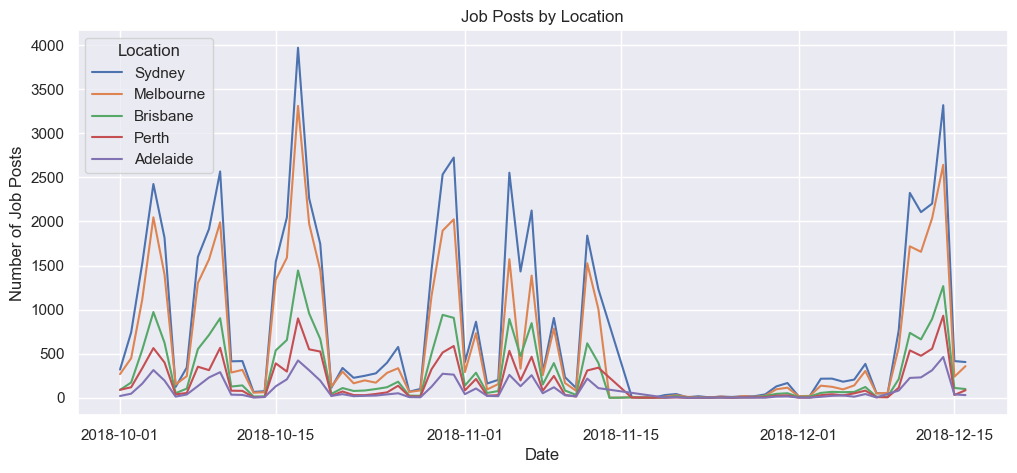

In [57]:
plt.figure(figsize=(12,5))
sns.lineplot(data=data_top_cities, x="Date", y = data_top_cities.values, hue="Location")
plt.title("Job Posts by Location")
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

#### Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion

<font color='Blue' size= '3'> 
From the above charts, we can say that Sydney has the first highest job postings which is follwed by the second highest job postings city Melbourne which follwed by Brisbane, and other cities Perth and Adelaide.

There is aslo a sudden downfall of job postings in all the top 5 cities from mid November where Sydney has 500, Melbourne has around 300, Brisbane and Perth almost having the same number of job posts around 0-15 and Adelaide having almost none which is again increased in the mid December though the highest postings are posted in the Sydney city. 

The total number of posts in Sydney city reached the highest number of 4000 in the mid October in 2018.</font>




## Forecasting and skill extractions.

### Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.

In [236]:
moving_avg = df['Date'].dt.date.value_counts().to_frame(name='Count')
moving_avg['date'] = moving_avg.index
moving_avg = moving_avg.sort_values(by="Date")
moving_avg

,Count,date
Date,,
2018-10-01,1023,2018-10-01
2018-10-02,1980,2018-10-02
2018-10-03,4945,2018-10-03
2018-10-04,8506,2018-10-04
2018-10-05,5711,2018-10-05
...,...,...
2019-03-09,1,2019-03-09
2019-03-10,2,2019-03-10
2019-03-11,17,2019-03-11


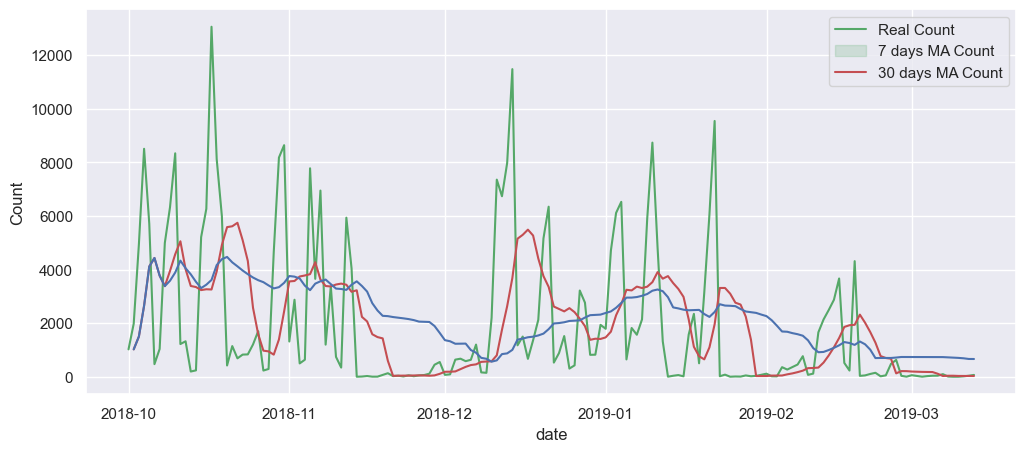

In [248]:
def moving_average(df, k):
    moving_avg_df = pd.DataFrame(columns=['Count','Date'])
    for i in range (0, 163):
        if i < k:
            history = df.Count[0:i]
            count_predict = history.mean()
        else:
            history = df.Count[i-k:i]
            count_predict = history.mean()
        moving_avg_df.loc[i] = [count_predict, df.date[i]]
    return moving_avg_df


plt.figure(figsize=(12,5))

moving_avg_7 = moving_average(moving_avg, 7)
moving_avg_30 = moving_average(moving_avg, 30)

sns.lineplot(x=moving_avg.date, y=moving_avg.Count, data=moving_avg, color='g')

sns.lineplot(x=moving_avg_7.Date, y=moving_avg_7.Count, data=moving_avg_7, color='r')

sns.lineplot(x=moving_avg_30.Date, y=moving_avg_30.Count, data=moving_avg_30, color='b')

plt.legend(labels=["Real Count","7 days MA Count", "30 days MA Count"])

plt.show()

#### <font color=blue>7 days moving average has made more accurate prediction as it takes sudden changes in the number of job postings.
#### <font color=blue>Also we can determine thta between 11/2018 and 12/2018, where the number of job postings suddently dropped, 7 moving average prediction took a few days to get to the real values, whereas 30 moving average prediction did not get to the real values until half way through 12/2018.</font>

### Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)

In [190]:
Information_Communication_Technology_df = df[df['Classification'] == 'Information & Communication Technology']
Information_Communication_Technology_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
89,37404291,Technical Support Engineer,FTI Consulting,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Act as an advisor to staff in all practice are...,NaN,0,30,NaN,0-30,15,8
96,37404325,Business Development Manager,TPG Telecom Limited,2018-10-07 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs",Information & Communication Technology,Sales - Pre & Post,Looking to get your foot in the door in a care...,NaN,0,30,NaN,0-30,15,8
127,37404230,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0,30,Full Time,0-30,15,8
130,37404370,Operations Delivery Manager,Woolworths Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,<p> </p>\n <div></div>\n <div></...,0,30,Full Time,0-30,15,8
133,37404174,Technical Support Executive - $70K + Super - C...,Command Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Do you have strong technical support skills? L...,<div>\n <ul>\n <li>Great s...,0,30,Full Time,0-30,15,8


In [191]:
Information_Communication_Technology_df["tokens"] = Information_Communication_Technology_df.apply(lambda row: nltk.word_tokenize(row["Requirement"]), axis = 1)
# Remove punctuation
Information_Communication_Technology_df["alpha"]= Information_Communication_Technology_df["tokens"].apply(lambda x:[item for item in x if item.isalpha()])
# Remove stop words
stop_words = stopwords.words("english")
Information_Communication_Technology_df["stop"] = Information_Communication_Technology_df["alpha"].apply(lambda x: [item for item in x if item not in stop_words])
# Stem
stemmer = PorterStemmer()
Information_Communication_Technology_df ["stemmed"] = Information_Communication_Technology_df["stop"].apply(lambda x: [stemmer.stem(item) for item in x])
Information_Communication_Technology_df ["stemmed"]

C:\Users\rames\AppData\Local\Temp\ipykernel_8328\3499637724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Information_Communication_Technology_df["tokens"] = Information_Communication_Technology_df.apply(lambda row: nltk.word_tokenize(row["Requirement"]), axis = 1)
C:\Users\rames\AppData\Local\Temp\ipykernel_8328\3499637724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Information_Communication_Technology_df["alpha"]= Information_Communication_Technology_df["tokens"].apply(lambda x:[item for ite

89        [act, advisor, staff, practic, area, it, issu,...
96        [look, get, foot, door, career, sale, join, on...
127       [system, engin, work, lead, msp, treat, employ...
130       [readi, challeng, opportun, part, one, excit, ...
133       [do, strong, technic, support, skill, love, wo...
                                ...                        
197204    [senior, data, engin, requir, build, devic, io...
197208    [multipl, job, opportun, canberra, locat, tspv...
197217                    [abil, deliv, wide, feder, model]
197218    [great, opportun, it, test, it, test, analyst,...
197228    [vmware, engin, need, vmware, migrat, project,...
Name: stemmed, Length: 22787, dtype: object

In [192]:
vectorizer = CountVectorizer(lowercase= False, analyzer = lambda x: x)
BOW = vectorizer.fit_transform(Information_Communication_Technology_df["stemmed"]).toarray()
BOW.shape

(22787, 5766)

In [193]:
TF = pd.DataFrame(data = BOW, columns = vectorizer.get_feature_names_out())
TF = TF.divide(TF.sum(axis = 1), axis=0)
TF.head(10)

,a,aa,aaa,aam,aaron,abap,abbotsford,abc,abil,abl,...,zealand,zendesk,zeplin,zero,zetta,znode,zoho,zone,zoo,zscaler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
IDF = pd.DataFrame(data = BOW, columns = vectorizer.get_feature_names_out())
IDF[IDF>1] = 1
IDF = np.log(len(IDF)/IDF.sum(axis=0))
IDF

a           3.144354
aa          8.935333
aaa        10.033945
aam         8.935333
aaron      10.033945
             ...    
znode       9.340798
zoho       10.033945
zone        8.935333
zoo        10.033945
zscaler    10.033945
Length: 5766, dtype: float64

In [195]:
tfidf = TF*IDF
tfidf

,a,aa,aaa,aam,aaron,abap,abbotsford,abc,abil,abl,...,zealand,zendesk,zeplin,zero,zetta,znode,zoho,zone,zoo,zscaler
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.127899,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
high_words = "Highest TF-IDF words: \n", tfidf.max(axis = 0).sort_values(ascending = False)[:10]
high_words

('Highest TF-IDF words: \n',
 avocado         10.033945
 tibco            7.261357
 till             6.205304
 interview        5.556609
 bau              5.545309
 appasur          5.016973
 synolog          5.016973
 c                4.686838
 cryptographi     4.467667
 vlociti          4.467667
 dtype: float64)

In [197]:
print("Lowest TF-IDF words: \n", tfidf.min(axis = 0).sort_values(ascending = True)[:10])

Lowest TF-IDF words: 
 a            0.0
permen       0.0
permanenc    0.0
perman       0.0
permament    0.0
perm         0.0
perl         0.0
perk         0.0
period       0.0
permnan      0.0
dtype: float64


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [4]:
import sys
print(sys.executable)

C:\Users\prudh\AppData\Local\Programs\Python\Python311\python.exe


In [60]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     -------------------------------------- 151.4/151.4 kB 3.0 MB/s eta 0:00:00


In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
from collections import Counter
from IPython.display import display, HTML
import re
from wordcloud import WordCloud
def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    
    plt.figure(figsize=(16,16))
    plt.suptitle(t="Information & Communication Technology", size=16, weight='bold', x=0.5,y=0.76)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
     
interact(update, Classification=classifications)

interactive(children=(Dropdown(description='Classification', index=13, options=('Retail & Consumer Products', …

<function __main__.update(Classification='Information & Communication Technology')>

After executing the above code , the wordcloud displayed for 'Information & Communication Technology' is as shown below:

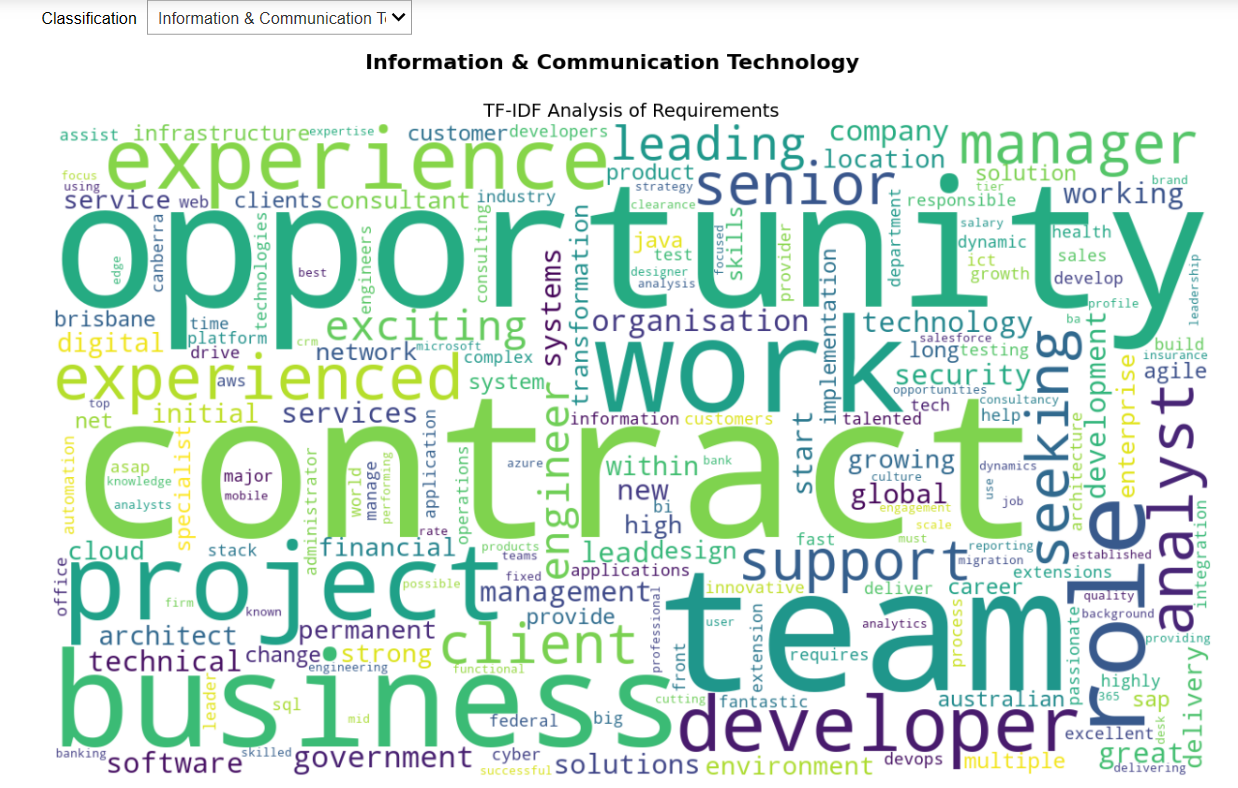

## Part 4 – Discussion. [4 points]
### Scenario 1: Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words) 

In [221]:
df.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15,8


In [224]:
# getting the data in QLD top 10 by population (tkaen from wikipedia)

QLD_areas = ["Brisbane", 
             "Gold Coast", 
             "Sunshine Coast", 
             "Cairns & Far North", 
             "Toowoomba & Darling Downs", 
             "Mackay & Coalfields",
             "Rockhampton & Capricorn Coast",
             "Hervey Bay & Fraser Coast",
             "Bundaberg & Wide Bay Burnett",
             "Gladstone & Central QLD"]
data_QLD = df.loc[df['Location'].isin(QLD_areas)]
data_QLD.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15,8
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0-30,15,8
13,37404335,BPV_Utility All Rounders_Casual,ISS Facility Services,2018-10-07 00:00:00+00:00,Mackay & Coalfields,NaN,Hospitality & Tourism,Housekeeping,An exciting opportunity exists for Casual DIDO...,NaN,0,30,NaN,0-30,15,8
15,37404259,Customer Service Officer,NaN,2018-10-07 00:00:00+00:00,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,0,30,NaN,0-30,15,8
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,0-30,15,8


In [227]:
# getting data where the average salary is >= 80

data_QLD = data_QLD.loc[data_QLD["AverageSalary"] >= 80]
data_QLD.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
14314,37399942,Industry Trainers needed – Central Queensland,Corporate Protection Australia,2018-10-05 00:00:00+00:00,Gladstone & Central QLD,NaN,Education & Training,Teaching - Vocational,"Baseline Training Pty Ltd, part of the CPA Gro...","<p>Corporate Protection Australia Group, incor...",80,100,Casual/Vacation,80-100,90,8
14349,37399675,PHARMACIST - 2 IC,Star Pharmacy Group,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Exclusive opportunity to have permanent roster...,"<h2 class=""subheading"">Smithfield - Star Disco...",80,100,Part Time,80-100,90,8
14354,37399661,Clinical Care Coordinator - Toowoomba,Redstone Recruitment Pty Ltd,2018-10-05 00:00:00+00:00,Toowoomba & Darling Downs,NaN,Healthcare & Medical,Nursing - Aged Care,Experienced Registered Nurse/Clinical Nurse re...,"<p style=""text-align:center;""><strong>Clinical...",80,100,Full Time,80-100,90,8
14369,37399594,Quality Assurance Site Engineer,Now Careers Pty Ltd,2018-10-05 00:00:00+00:00,Brisbane,Northern Suburbs,Engineering,Civil/Structural Engineering,QA Engineer for a 6 Month Contract - Civil or ...,Now Careers is working with a Tier 3 Building ...,80,100,Contract/Temp,80-100,90,8
14371,37399589,Training Officer,CONCENTIS PTY LTD,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,"Mining, Resources & Energy",Other,Weipa based role for a self starter with excel...,<div>This role is a great opportunity for a se...,80,100,Contract/Temp,80-100,90,8


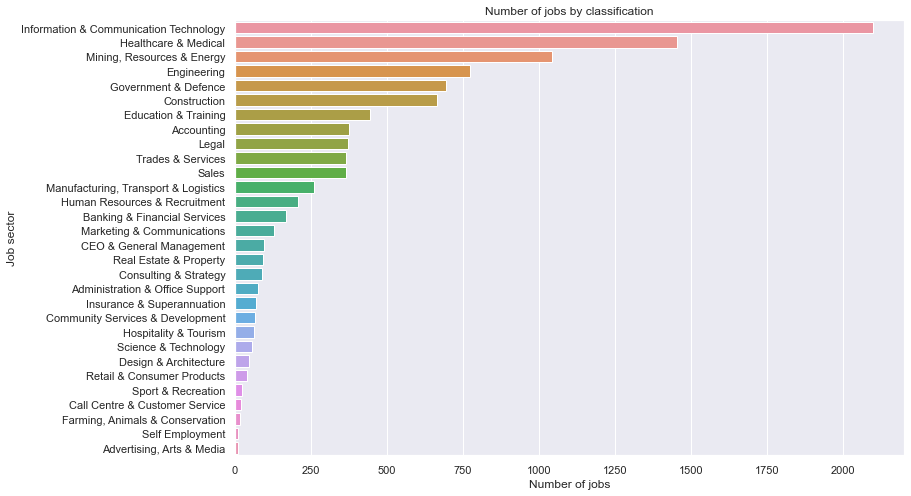

In [228]:
# get the index (classification) and the values (classification count) from the panda series
QLD_job_sectors=data_QLD.Classification.value_counts().sort_values(ascending=False).index
QLD_job_sectors_count=data_QLD.Classification.value_counts().sort_values(ascending=False).values

# changing the sns figure size
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(x=QLD_job_sectors_count, y=QLD_job_sectors).set(title="Number of jobs by classification")
plt.ylabel('Job sector')
plt.xlabel('Number of jobs')
plt.show()

##### <font color=blue>The job post must be in top 10 most populated cities/areas in Queensland (according to wikipedia)
##### <font color=blue>The job post must have an average salary of 80 or above
##### <font color=blue>According to the above graph, Tom should choose his major that belongs to either "Information & Communication Technology" or "Healthcare & Medical" sector which seems to have more number of jobs </font>

### When happens when Tom choose IT? Lets explore more

In [229]:
data_QLD_IT = data_QLD.loc[data_QLD['Classification'] == "Information & Communication Technology"]
data_QLD_IT.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
14390,37399477,Business Application Support,Dimension Data,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,"Business Application Support, you will be resp...",<p><strong><br>Do you believe you can do anyth...,80,100,Contract/Temp,80-100,90,8
14525,37398714,Site Support Technician,Hays Information Technology,2018-10-05 00:00:00+00:00,Mackay & Coalfields,NaN,Information & Communication Technology,Telecommunications,"Site Support Technician job, ASAP start Mon-Fr...","<p>Site Support Technician job, ASAP start Mon...",80,100,Contract/Temp,80-100,90,8
14526,37398708,Front End Developer (Angular),Talent – Winner ‘Seek Large Recruitment Agency...,2018-10-05 00:00:00+00:00,Brisbane,NaN,Information & Communication Technology,Developers/Programmers,Talent are delighted to announce our partnersh...,Talent are delighted to announce our partnersh...,80,100,Full Time,80-100,90,8
14875,37396256,Enterprise Business Analyst,Sunsuper Pty Ltd,2018-10-04 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Business/Systems Analysts,"Support the identification, analysis and submi...",<p><strong>About Sunsuper...</strong></p>\n ...,80,100,Full Time,80-100,90,8
14963,37395547,Agile Business Analyst,PRA,2018-10-04 00:00:00+00:00,Brisbane,Northern Suburbs,Information & Communication Technology,Business/Systems Analysts,Use your strong Business Analysis skills to dr...,<ul>\n <li><strong>North-side Locatio...,80,100,Full Time,80-100,90,8


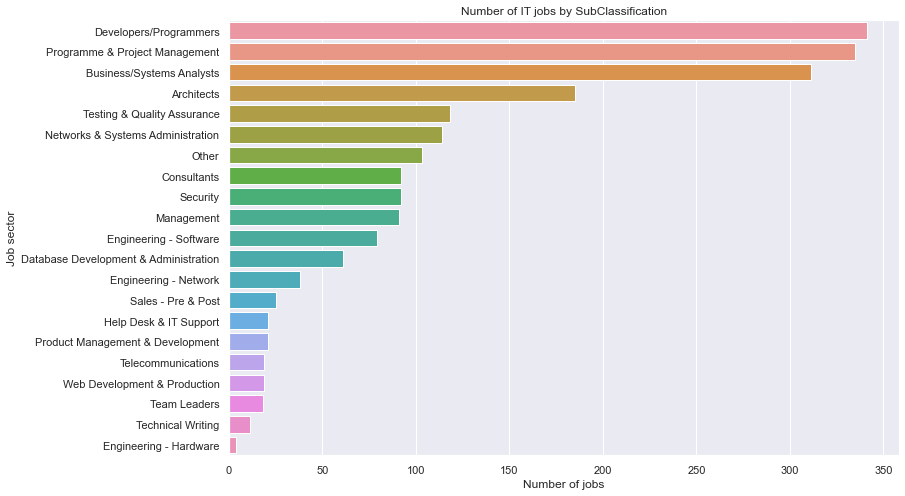

In [232]:
# get the index (classification) and the values (classification count) from the panda series
QLD_job_sectors_IT=data_QLD_IT.SubClassification.value_counts().sort_values(ascending=False).index
QLD_job_sectors_count_IT=data_QLD_IT.SubClassification.value_counts().sort_values(ascending=False).values

# changing the sns figure size
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(x=QLD_job_sectors_count_IT, y=QLD_job_sectors_IT).set(title="Number of IT jobs by SubClassification")
plt.ylabel('Job sector')
plt.xlabel('Number of jobs')
plt.show()

#### <font color=blue>From the above analysis, I would recommend Tom to Choose IT where he can aim to become a Developers/ Programmers or project management. </font>

### Let's find the Salary for these fields

In [234]:
data_QLD_IT_dev = data_QLD_IT.loc[data_QLD_IT['SubClassification'] == "Developers/Programmers"]
data_QLD_IT_dev["AverageSalary"].mean()

215.7507331378299

In [235]:
data_QLD_IT_dev = data_QLD_IT.loc[data_QLD_IT['SubClassification'] == "Business/Systems Analysts"]
data_QLD_IT_dev["AverageSalary"].mean()

255.84244372990355

####  <font color=blue>Though the number of job posts for Programmer/Dev is higher than the number of job posts for Business/Systems Analysts, the average salary for a Business/System Analysts is higher than the average salary of a Programmer/dev

#### <font color=blue>Tom should focus more on studying courses that has more Programming if he wants to have a higher chance of getting a job. He can do a Major in Information technology or Computer Science. </font>

### When happens when Tom choose Healthcare? Lets explore more

In [236]:
data_QLD_Healthcare = data_QLD.loc[data_QLD['Classification'] == "Healthcare & Medical"]
data_QLD_Healthcare.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,AverageSalary,Id_length
14349,37399675,PHARMACIST - 2 IC,Star Pharmacy Group,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Exclusive opportunity to have permanent roster...,"<h2 class=""subheading"">Smithfield - Star Disco...",80,100,Part Time,80-100,90,8
14354,37399661,Clinical Care Coordinator - Toowoomba,Redstone Recruitment Pty Ltd,2018-10-05 00:00:00+00:00,Toowoomba & Darling Downs,NaN,Healthcare & Medical,Nursing - Aged Care,Experienced Registered Nurse/Clinical Nurse re...,"<p style=""text-align:center;""><strong>Clinical...",80,100,Full Time,80-100,90,8
14444,37399178,Registered & Enrolled Nurse - Medical Surgical,Healthcare Australia Qld,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,Nursing - General Medical & Surgical,EXTRA CA$H FOR CHRISTMAS,<strong>Healthcare Australia</strong>&nbsp;is ...,80,100,Casual/Vacation,80-100,90,8
14445,37399173,Registered Nurse - Mental Health,Healthcare Australia Qld,2018-10-05 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,"Nursing - Psych, Forensic & Correctional Health",The Demand for experienced Mental Health Nurse...,<strong>Healthcare Australia</strong> is the l...,80,100,Casual/Vacation,80-100,90,8
14546,37398594,"Hospital Pharmacist, QLD",Your World Healthcare,2018-10-05 00:00:00+00:00,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Your World Healthcare are working to recruit a...,<p>We are excited to be working on a locum Pha...,80,100,Contract/Temp,80-100,90,8


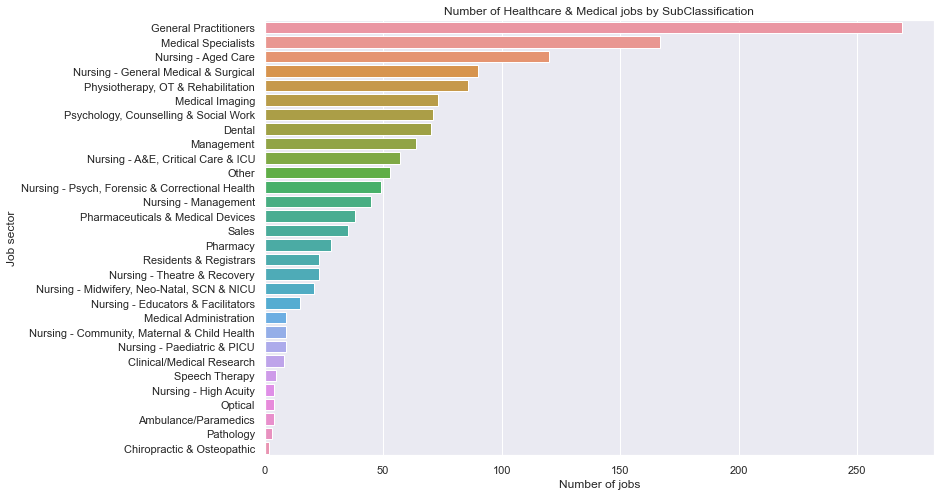

In [237]:
# get the index (classification) and the values (classification count) from the panda series
QLD_job_sectors_Healthcare=data_QLD_Healthcare.SubClassification.value_counts().sort_values(ascending=False).index
QLD_job_sectors_count_Healthcare=data_QLD_Healthcare.SubClassification.value_counts().sort_values(ascending=False).values

# changing the sns figure size
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(x=QLD_job_sectors_count_Healthcare, y=QLD_job_sectors_Healthcare).set(title="Number of Healthcare & Medical jobs by SubClassification")
plt.ylabel('Job sector')
plt.xlabel('Number of jobs')
plt.show()

### Let's find the salary in Healthcare

In [239]:
data_QLD_Healthcare_GP = data_QLD_Healthcare.loc[data_QLD_Healthcare['SubClassification'] == "General Practitioners"]
data_QLD_Healthcare_GP["AverageSalary"].mean()

501.82156133828994

In [241]:
data_QLD_Healthcare_MS = data_QLD_Healthcare.loc[data_QLD_Healthcare['SubClassification'] == "Medical Specialists"]
data_QLD_Healthcare_MS["AverageSalary"].mean()

353.7784431137725

## <font color=blue>Conclusion for Scenario 1 :
### <font color=blue>With the above analysis, my suggestion for top 4 Major/Subjects Tom should aim for are:

#### <font color=blue>Bachelor of Medical to become a General Pratitioner (Healthcare & Medical) which has the Highest average salary as there are decent amount of job posts

#### <font color=blue>Subjects related to Medical Specialist (Healthcare & Medical) 

#### <font color=blue>Subjects related to Business/System Analysts (IT) which is in huge demand in Queensland

#### <font color=blue>Course related to Information technology so he can become Developer/Programmer (IT) which is a high paying job according to the dataset.</font>
    
####  <font color=blue>Though the number of job posts for Programmer/Dev is higher than the number of job posts for Business/Systems Analysts, the average salary for a Business/System Analysts is higher than the average salary of a Programmer/dev

#### <font color=blue>Tom should focus more on studying courses that has more Programming if he wants to have a higher chance of getting a job. He can do a Major in Information technology or Computer Science. </font>
    
#### <font color=blue> If Tom would prefer Healthcare over IT I would recommend him to study Bachelor of Medical or Bachelor of Science in Nursing which will aim to be a GP or Nurse as the amount of job posts are higher, and eventually help him get a high paying job once he completes his degree. </font>

## Scenario 2:
#### To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)

#### <font color=blue>We are going to consider Job classification that has more number of jobs and a job classification that has least number of jobs to figure out which major needs an extension and which should be reduced in order to attract more students that will help them enhance empoyment opportunity for Major they study in Griffith University.</font>

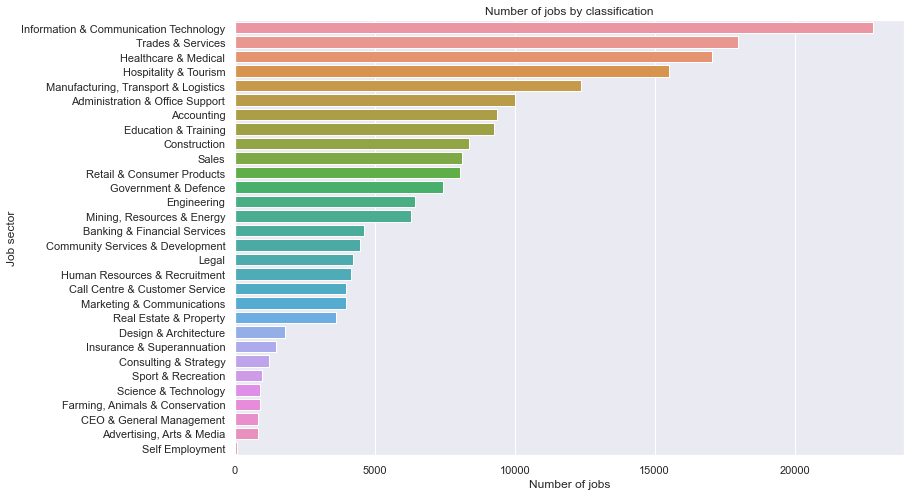

In [243]:
# get the index (classification) and the values (classification count) from the panda series
job_sectors=df.Classification.value_counts().sort_values(ascending=False).index
job_sectors_count=df.Classification.value_counts().sort_values(ascending=False).values

# changing the sns figure size
sns.set(rc={'figure.figsize':(12,8)})

sns.barplot(x=job_sectors_count, y=job_sectors).set(title="Number of jobs by classification")
plt.ylabel('Job sector')
plt.xlabel('Number of jobs')
plt.show()

#### <font color=blue> From above chart, it proves that Classification "Information & Communication Technology" has more job postings and the least number of jobs available are for classification "Advertising, Arts and Media".</font>

### <font color=blue>Analyse the subclassification and job postings of 'Information & Communication Technology'</font>

,IT sub-sectors,job postings
0,Developers/Programmers,4210
1,Business/Systems Analysts,2982
2,Programme & Project Management,2413
3,Architects,1547
4,Engineering - Software,1436


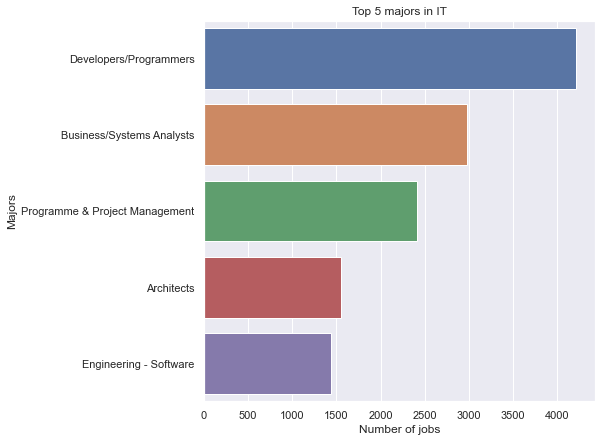

In [258]:
data_IT = df.loc[df['Classification']=='Information & Communication Technology']

majors_IT = data_IT['SubClassification'].value_counts()
names_IT = majors_IT.index[:5]
values_IT = majors_IT.values[:5]

# changing the sns figure size
sns.set(rc={'figure.figsize':(7,7)})

sns.barplot(x=values_IT, y=names_IT).set(title="Top 5 majors in IT")
plt.ylabel('Majors')
plt.xlabel('Number of jobs')

df_it=df[df['Classification']=='Information & Communication Technology']
df_subcls_jobs=df_it['SubClassification'].value_counts(ascending=False)
pd_subsectors=pd.DataFrame({'IT sub-sectors':df_subcls_jobs.index, 'job postings':df_subcls_jobs.values})
pd_subsectors.head(5)

### <font color=blue>Analyse the subclassification and job postings of 'Advertising, Arts and Media'</font>

,"Advertising, Arts & Media sub-sectors",job postings
0,Photography,43
1,Management,42
2,Promotions,37
3,Event Management,37
4,Art Direction,31


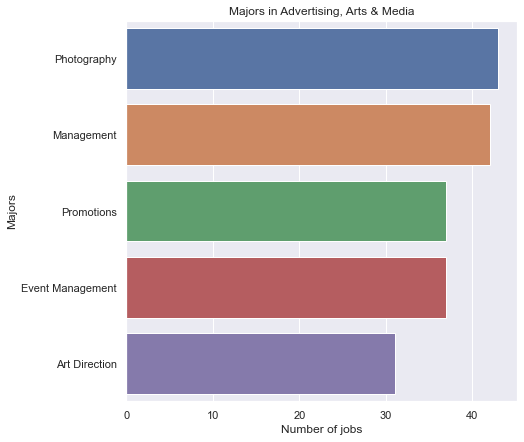

In [275]:
data_adv = df.loc[df['Classification']=='Advertising, Arts & Media']

majors_adv = data_adv['SubClassification'].value_counts()
names_adv = majors_adv.index[-5:]
values_adv = majors_adv.values[-5:]

# changing the sns figure size
sns.set(rc={'figure.figsize':(7,7)})

ax = sns.barplot(x=values_adv, y=names_adv).set(title="Majors in Advertising, Arts & Media")
plt.ylabel('Majors')
plt.xlabel('Number of jobs')

df_adv=df[df['Classification']=='Advertising, Arts & Media']
df_subcls_jobs_adv=df_adv['SubClassification'].value_counts()
pd_subsectors_adv=pd.DataFrame({'Advertising, Arts & Media sub-sectors':df_subcls_jobs_adv.index[-5:], 'job postings':df_subcls_jobs_adv.values[-5:]})
pd_subsectors_adv.head(5)

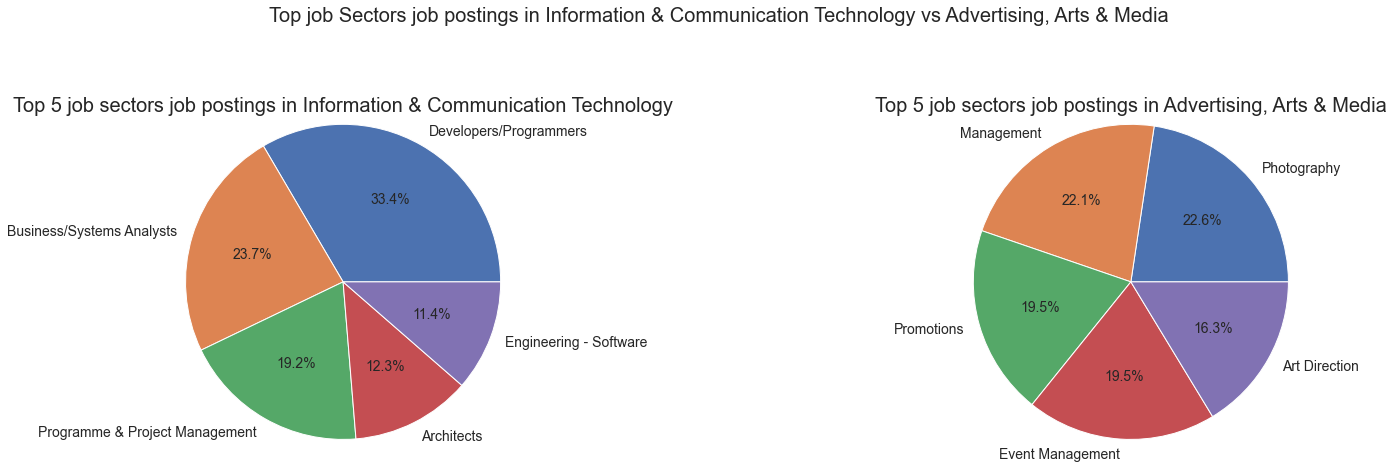

In [308]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 3)
fig.suptitle('Top job Sectors job postings in Information & Communication Technology vs Advertising, Arts & Media',fontsize=20)

ax1.pie(pd_subsectors.head(5)['job postings'], 
        labels=pd_subsectors.head()['IT sub-sectors'],
         autopct='%.1f%%',textprops={'fontsize': 14},
        radius=1.2) 
ax1.set_title('Top 5 job sectors job postings in Information & Communication Technology',fontsize=20)

ax2.pie(pd_subsectors_adv.head(5)['job postings'], 
        labels=pd_subsectors_adv.head()['Advertising, Arts & Media sub-sectors'],
         autopct='%.1f%%',textprops={'fontsize': 14},
        radius=1.2)
ax2.set_title('Top 5 job sectors job postings in Advertising, Arts & Media',fontsize=20)

plt.show()

#### <font color=blue>The above pie chart shows the job postings and the top 5 sectors in Information and Communication technology and Adversting, Arts and Media. The top most major of Information and Communication technology is Developers/Programmers where the job postings are about 4210 whereas the Major Photography under Adversting, Arts and Media have a job posting of about only 43 which is very less when compared to majors in Information & Communication Technology. 
#### <font color=blue>This is one of the proof that Griffith University should reduce courses related to Photography,Management, Promotions, Event Management, Art Direction.</font>

In [297]:
df_ITC = df[df['Classification']=='Information & Communication Technology']
df_adv = df[df['Classification']=='Advertising, Arts & Media']

df_sal=df.copy()
df_sal['Job_postings']=1
df_sal['SalaryRange']=df_sal['LowestSalary'].astype(str) +'-'+ df_sal['HighestSalary'].astype(str)
df_sal_salary_ranges=df_sal.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)

In [295]:
df_ITC=df_ITC.copy()
df_ITC['Job_postings']=1
df_ITC['SalaryRange']=df_ITC['LowestSalary'].astype(str) +'-'+ df_ITC['HighestSalary'].astype(str)
df_ITC_salary_ranges = df_ITC.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)
df_ITC_salary_ranges


,SalaryRange,Job_postings
3,150-200,5649
0,0-30,3663
2,120-150,3537
4,200-999,3452
1,100-120,2765
10,80-100,1334
9,70-80,842
8,60-70,620
7,50-60,347
6,40-50,299


In [296]:
df_adv=df_adv.copy()
df_adv['Job_postings']=1
df_adv['SalaryRange']=df_adv['LowestSalary'].astype(str) +'-'+ df_adv['HighestSalary'].astype(str)
df_adv_salary_ranges=df_adv.groupby(['SalaryRange'],sort=True).agg({'Job_postings': 'sum'}).reset_index().sort_values(['Job_postings'], ascending=False)
df_adv_salary_ranges

,SalaryRange,Job_postings
0,0-30,173
9,70-80,123
6,40-50,106
8,60-70,86
7,50-60,82
10,80-100,64
5,30-40,57
1,100-120,56
2,120-150,43
3,150-200,32


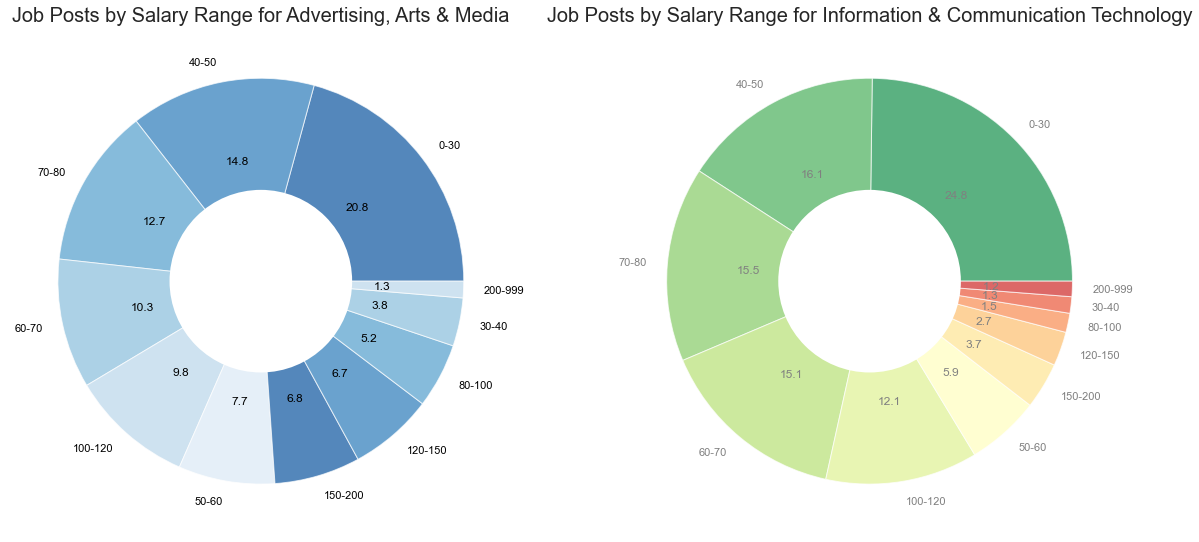

In [307]:
#create layout
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(20,20))

#Brisbane salary ranges plot
p, texts, autotexts = ax1.pie(df_ITC_salary_ranges['Job_postings'], colors=sns.color_palette("RdYlGn_r", len(df_ITC_salary_ranges)),labels=df_sal_salary_ranges['SalaryRange'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax1.title.set_text('Job Posts by Salary Range for Information & Communication Technology')
ax1.title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax1.add_patch(centre_circle)

for t in texts:
    t.set_color('gray')
for t in autotexts:
    t.set_color('gray')
    t.set_size(12)
    
#Gold Coast salary ranges plot   
p2, texts2, autotexts2 = ax2.pie(df_adv_salary_ranges['Job_postings'], colors=sns.color_palette("Blues_r"),labels=df_sal_salary_ranges['SalaryRange'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax2.title.set_text('Job Posts by Salary Range for Advertising, Arts & Media')
ax2.title.set_size(20)

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax2.add_patch(centre_circle2)

for t in texts2:
    t.set_color('black')
for t in autotexts2:
    t.set_color('black')
    t.set_size(12)
    
plt.show()

### <font color=blue>Let's find the intersting sectors in overall industry</font>

### <font color=blue>Job sub-sector with high job postings</font>

,Overall sub-sectors,job postings
0,Management,6230
1,Chefs/Cooks,4596
2,Administrative Assistants,4571
3,Developers/Programmers,4210
4,Retail Assistants,3901


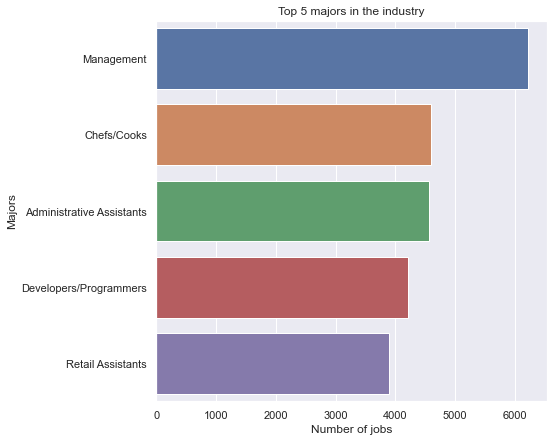

In [314]:
data_sub = df[df.SubClassification!= 'Other']

majors_ = data_sub['SubClassification'].value_counts()
names_ = majors_.index[:5]
values_ = majors_.values[:5]

# changing the sns figure size
sns.set(rc={'figure.figsize':(7,7)})

ax = sns.barplot(x=values_, y=names_).set(title="Top 5 majors in the industry")
plt.ylabel('Majors')
plt.xlabel('Number of jobs')

df_overall=df[df.SubClassification!= 'Other']
df_subcls_jobs_overall=df_overall['SubClassification'].value_counts(ascending=False)
pd_subsectors_overall=pd.DataFrame({'Overall sub-sectors':df_subcls_jobs_overall.index, 'job postings':df_subcls_jobs_overall.values})
pd_subsectors_overall.head(5)

### Job sub-sectors with least job postings

,"Advertising, Arts & Media sub-sectors",job postings
0,Illustration & Animation,14
1,Computer Operators,13
2,Air Force,12
3,Chiropractic & Osteopathic,11
4,Army,5


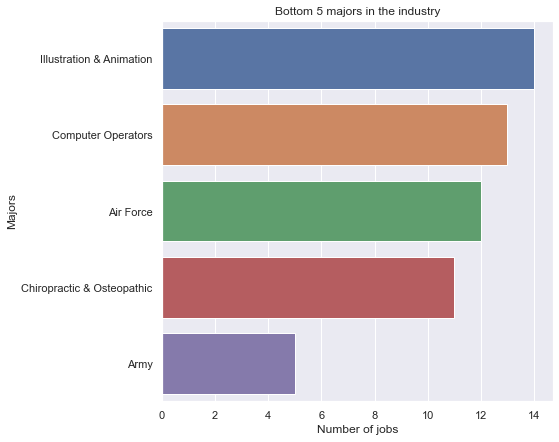

In [316]:
data_sub = df[df.SubClassification!= 'Other']

majors_ = data_sub['SubClassification'].value_counts()
names_ = majors_.index[-5:]
values_ = majors_.values[-5:]

# changing the sns figure size
sns.set(rc={'figure.figsize':(7,7)})

ax = sns.barplot(x=values_, y=names_).set(title="Bottom 5 majors in the industry")
plt.ylabel('Majors')
plt.xlabel('Number of jobs')

df_least=df[df.SubClassification!= 'Other']
df_subcls_jobs_least=df_least['SubClassification'].value_counts()
pd_subsectors_least=pd.DataFrame({'Advertising, Arts & Media sub-sectors':df_subcls_jobs_least.index[-5:], 'job postings':df_subcls_jobs_least.values[-5:]})
pd_subsectors_least.head(5)

## <font color=blue>Conclusion for Scenario 2

<font color=blue>Below are the top 5 majors in Overall industry
- <font color=blue>Management - 6230
- <font color=blue>Chefs/Cooks - 4596
- <font color=blue>Administrative Assistants - 4571
- <font color=blue>Developers/Programmers  - 4210
- <font color=blue>Retail Assistants - 3901

<font color=blue>Below are the least major in Overall industry
- <font color=blue>Illustration & Animation  - 14
- <font color=blue>Computer Operators  - 13
- <font color=blue>Air Force  - 12
- <font color=blue>Chiropractic & Osteopathic - 11
- <font color=blue>Army  - 5

<font color=blue>Below are the top 5 majors in Information & Communication Technology
- <font color=blue>Developers & Programmers  - 4210
- <font color=blue>Business/System Analysts - 2982
- <font color=blue>Programmer & Project Management  - 2413
- <font color=blue>Architects  - 1547
- <font color=blue>Engineering - Software  - 1436

<font color=blue>Below are the least 5 major in Adertising, Arts & Media
- <font color=blue>Photography  - 43
- <font color=blue>Management - 42
- <font color=blue>Promotions - 37
- <font color=blue>Event Management  - 37
- <font color=blue>Art Direction  - 31

<font color=blue>From above analysis, we would recommend Griffith University to 
- <font color=blue>reduce courses related to Adverstsing, Arts and Media. While reasearching Griffith site for courses related to Adverstsing, Arts and Media, we figured that reducing course 'BACHELORS OF VISUAL ARTS / BUSINESS'(Major - Photography) and 'BUSINESS EVENT MANAGEMENT' would increase the reputation of Griffith University as Job postings are very less when compared to other courses. 
- <font color=blue>Extend more of courses such as Master's of Information technology with Major in Data Analytics, Information Systems and Enterprise Architecture, Networking and Security, Software Development and Support as these Major's have high job postings and great salary range. 
- <font color=blue>Also extend Majors related to Trades and Services, Healthcare and Medical. </font>